In [1]:
import nltk
import pandas as pd

In [2]:
!pip install nltk

In [3]:
import nltk

In [5]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sunandan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sunandan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [9]:
swords = stopwords.words("english")
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
ps = PorterStemmer()

In [11]:
# Sentence cleanup method

def cleanSentence(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean]
    return clean

In [13]:
cleanSentence("Hello there, I'm using Whatsapp!")

['hello', 'there', 'i', 'use', 'whatsapp']

In [29]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names=["Label", "Content"])
df

,Label,Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(analyzer=cleanSentence)


In [44]:
x = df.Content
y = df["Label"]
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 5572, dtype: object

In [21]:
newX = tfidf.fit_transform(x)

In [45]:
y.value_counts()


ham     4825
spam     747
Name: Label, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xTrain, xTest, yTrain, yTest = train_test_split(newX,y, test_size=0.25)

In [48]:
xTrain

<4179x6531 sparse matrix of type '<class 'numpy.float64'>'
	with 57311 stored elements in Compressed Sparse Row format>

In [49]:
yTest

4700     ham
545      ham
2211     ham
4749     ham
2275     ham
        ... 
5390     ham
300      ham
3793     ham
876     spam
4663     ham
Name: Label, Length: 1393, dtype: object

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb = GaussianNB()

In [53]:
nb.fit(xTrain.toarray(),yTrain)

GaussianNB()

In [56]:
pred = nb.predict(xTest.toarray())
pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

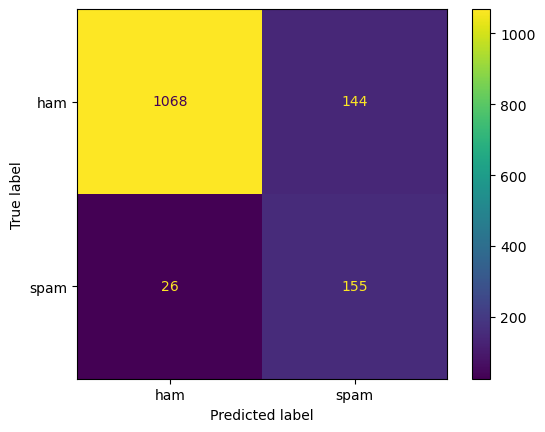

In [58]:
ConfusionMatrixDisplay.from_predictions(yTest, pred)

In [59]:
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

         ham       0.98      0.88      0.93      1212
        spam       0.52      0.86      0.65       181

    accuracy                           0.88      1393
   macro avg       0.75      0.87      0.79      1393
weighted avg       0.92      0.88      0.89      1393



In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(random_state=23)

In [62]:
rf.fit(xTrain, yTrain)

RandomForestClassifier(random_state=23)

In [64]:
pred = rf.predict(xTest)
pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

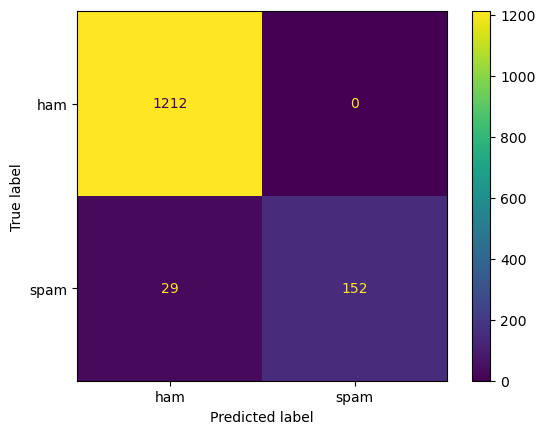

In [66]:
ConfusionMatrixDisplay.from_predictions(yTest, pred)

In [67]:
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1212
        spam       1.00      0.84      0.91       181

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()

In [74]:
lr.fit(xTrain, yTrain)

LogisticRegression()

In [75]:
pred = lr.predict(xTest)

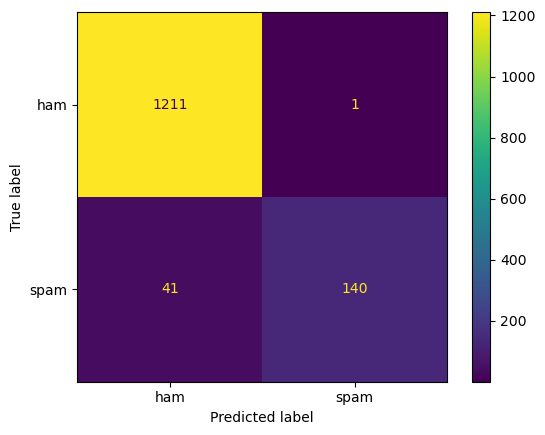

In [76]:
ConfusionMatrixDisplay.from_predictions(yTest, pred)

In [77]:
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1212
        spam       0.99      0.77      0.87       181

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

